# I'm still not sure if Palmer Penguins is okay

So just like in the Perceptron module, I'm not sure if it's okay to implement linear regression on the Palmer Penguins module, so I'm just doing another application of linear regression on the mushrooms dataset.

[The Mushrooms Dataset](https://archive.ics.uci.edu/dataset/73/mushroom) contains samples from 23 species of gilled mushrooms, in which mushrooms are classified to be edible or poisonous. The other key features are defined here:

1) cap_diameter
2) cap-shape
3) gill-attachment 
4) gill_color
5) stem_height
6) stem_width
7) stem-color
8) season
9) class

For this linear regression task, we will be using stem width to predict cap diameter for edible mushrooms.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


sns.set_theme()

url = r"C:\Users\faith\new577\INDE577\577repo\Supervised Learning\Datasets\mushroom_cleaned.csv"
df = pd.read_csv(url)
df= df.dropna()
df.head()


,cap_diameter,cap-shape,gill-attachment,gill_color,stem_height,stem_width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


Next, we train the data.

In [41]:
#make the data sets and split into testing and training
df_edible = df[df['class'] == 0]
X = df_edible[['stem_width']]
y = df_edible['cap_diameter']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#train the data and predict
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)

print(X.shape[0])

24360


And then we analyze the accuracy.

In [ ]:
test_score_mse = mean_squared_error(y_test, y_pred_test)
test_score_r2 = r2_score(y_test, y_pred_test)

#testing accuracy score
print(f"Test MSE score: {test_score_mse}")
print(f"Test R^2 score: {test_score_r2}")

Test MSE score: 44644.45554755686
Test R^2 score: 0.6348357659008332


Not bad! The MSE is kind of large, but the R^2 score tells us that 63% of the variance in the dependent variable can be explained by the independent variable.

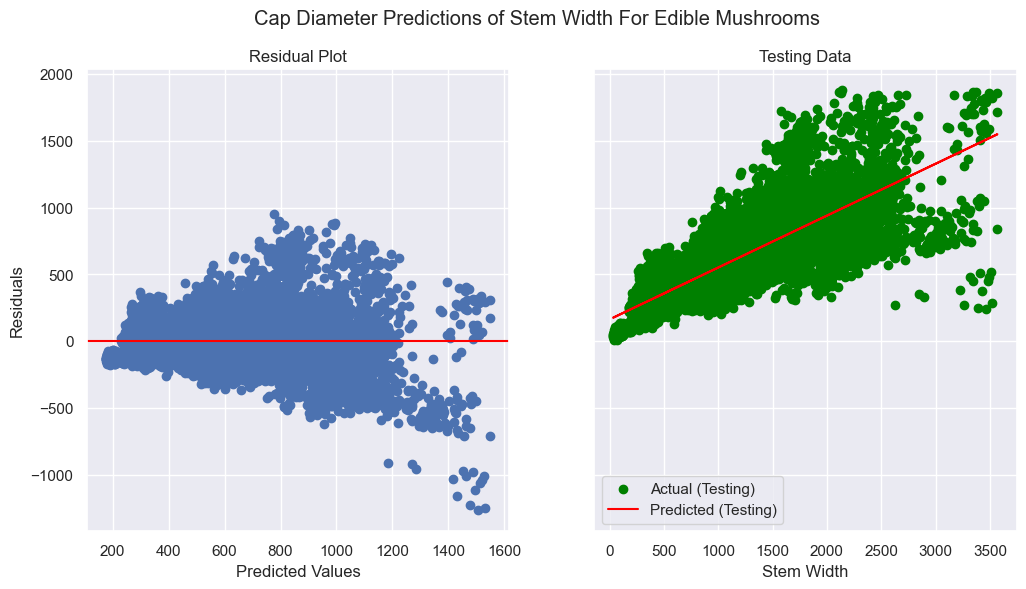

In [43]:
#plotting the results
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

residuals = y_test - y_pred_test
axes[0].scatter(y_pred_test, residuals)
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residual Plot')
axes[0].axhline(y=0, color='red', linestyle='-')

axes[1].scatter(X_test, y_test, color='green', label='Actual (Testing)')
axes[1].plot(X_test, y_pred_test, color='red', label='Predicted (Testing)')
axes[1].set_title('Testing Data')
axes[1].set_xlabel('Stem Width')
axes[1].legend()

plt.suptitle('Cap Diameter Predictions of Stem Width For Edible Mushrooms')
plt.show()

Not bad! There's definitely at least somewhat of a linear relationship between cap stem width and cap diameter, even if the residual plot does seem a bit extreme at times, so 64% accuracy is not bad at all.